# TP2 Analyse : Convolution

<u>***Un compte rendu est à déposer sur e-campus à la fin de la séance***</u>. *Il doit être rédigé directement dans ce document avec votre code que vous pourrez executer à partir de ce fichier section par section.*

*Il vous est demandé de montrer les résultats, de les analyser et les interpréter tout en répondant aux questions. Nous jugerons vos capacités à comprendre et interpréter mathématiquement les réalisations.*

**Assurez-vous toujours de la lisibilité des graphiques : intitulés des axes, légende, échelle, etc.**

<u>***Avant de rendre votre travail :***</u>
* ✅ *Exécutez toutes les cellules*
* ✅ *Assurez vous que tous vos résultats/figures sont bien visibles*
* ✅ *Exportez le fichier en format **pdf***
* ✅ *Déposez le **pdf** sur e-campus*

In [202]:
import matplotlib.pyplot as plt
import numpy as np

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

## 1- Mise en contexte
Dans de nombreux domaines, l’analyse des signaux repose sur des opérations permettant de relier une mesure à la réponse d’un système. Parmi elles, la convolution (et sa réciproque, la déconvolution) joue un rôle central. Elle permet de modéliser la façon dont un signal est modifié par un instrument ou un milieu, comme en profilométrie pour la mesure de topographie.

En microélectronique – et dans bien d’autres domaines – il est fréquent de devoir caractériser la topographie des structures fabriquées. Cette caractérisation s’effectue à l’aide de profilomètres mécaniques. Le principe consiste à faire glisser une pointe le long du motif. 

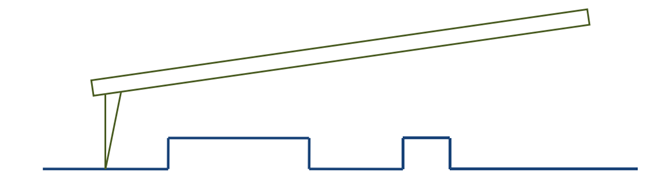

Mathématiquement, cela revient à convoluer le profil réel $s(x)$ et la fonction de forme de la pointe $p(x)$. Le signal mesuré est alors:
$ m(x) = s(x) * p(x)$ 

Lorsque la pointe est extrêmement fine, $ p(x)$ est comparable un Dirac, et $m(x)$ sera identique à $s(x)$. 
En pratique, la pointe d’un profilomètre n’est jamais infiniment fine, sa forme finie agit comme un filtre spatial, et le profil que l’on mesure est donc le profil réel convolué avec la fonction de forme de la pointe. Si les dimensions du motif à analyser sont suffisamment grandes par rapport à la taille de la pointe, on arrive à remonter fidèlement à la topographie du motif $s(x)$ en déconvoluant $m(x)$ par $ p(x)$. 
Cependant cette distorsion par fitrage spatial devient critique dès que les dimensions du motif à analyser sont de l’ordre de la taille de la pointe, et empêche le calcul correct de la topologie.

Par ailleurs, à l'usure, la pointe peut se casser ou s'arrondir et ainsi présenter des imperfections qui font que sa forme ne correspond plus à $ p(x)$ connue. Ainsi déconvoluer la mesure par $ p(x)$ ne nous permettra pas de remonter au profil exact.
Afin de pouvoir compenser ces imperfections , on procède régulièrement à une calibration du profilomètre en scannant des marches‑test, des structures dont la géométrie est précisément connue. En déconvoluant le profil mesuré avec la forme de la marche-test, on déduit la fonction de forme exacte de la pointe, puis on l’utilise pour les mesures ultérieures.

Les exercices qui suivent visent à :

* Se familiariser avec le produit de convolution à travers des manipulations numériques simples.
* Appliquer la convolution sur un profil, afin d’observer concrètement l’impact de la forme de la pointe et d’introduire les bases de la déconvolution.
  
Ces travaux permettront d’appréhender comment la convolution intervient dans la chaîne de mesure, ainsi que les stratégies possibles pour corriger les effets instrumentaux et récupérer le vrai profil de la structure étudiée.

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

## 2- Convolution de deux signaux élémentaires

On propose de générer sur N = 1024 points 
* un signal valant 0 jusqu’à la moitié de l’échantillon, puis exponentiel décroissant jusqu'à sa fin. On l'appellera `expo`
* un signal échelon unitaire valant 0 jusqu’à la moitié de l’échantillon, puis 1 jusqu'à sa fin. On l'appellera `echelon` 
  
Les signaux sont échantillonnés à une fréquence Fe = 8kHz, et le vecteur temps est défini de manière à ce que t=0 soit situé au centre des signaux.

🧩 Le code ci-dessous permet de les fabriquer, tracez-les sur un même graphique.

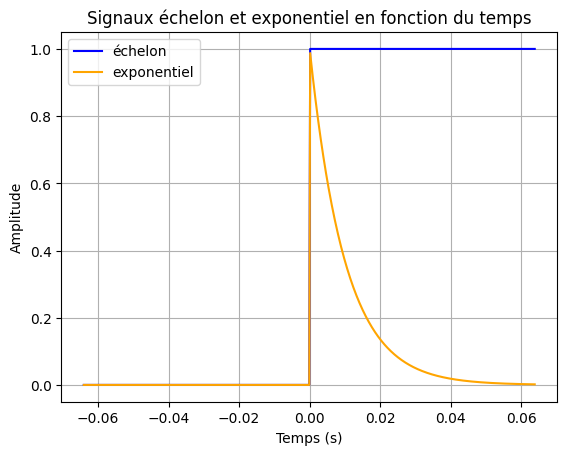

In [203]:
Fe = 8000   #fréquence d'échantillonnage
N = 1024    #nombre de points
t = np.arange(-N/2,((N/2)-1))/Fe   #échelle de temps centrée en 0
echelon = (1+np.sign(t))/2         #signal échelon
expo = echelon * np.exp(-t/0.01)   #signal exponentiel

#-----------------------------------------------------------------------------
# Tracer echelon et expo en fonction du temps sur un même graphique

plt.figure()
plt.plot(t, echelon, label='échelon', color='blue')
plt.plot(t, expo, label='exponentiel', color='orange')
plt.title("Signaux échelon et exponentiel en fonction du temps")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


### ✏️ 2.1 Convolution graphique "à la main" (4.5 pts)

A la main, convoluez graphiquement ces deux signaux. **Détaillez le processus et expliquez**. 

ℹ️*Vous pouvez insérer une photo directement dans la section réponse.*

![convolution](./convolution.jpeg)

### 🛠️ 2.2 Convolution numérique (1.5 pt)

La fonction ***convolve*** de **numpy** permet de calculer la convolution de 2 signaux. 
Utilisez-la pour convoluer les deux signaux echelon et expo fabriqués et tracez le résultat comme dans la figure ci-dessous

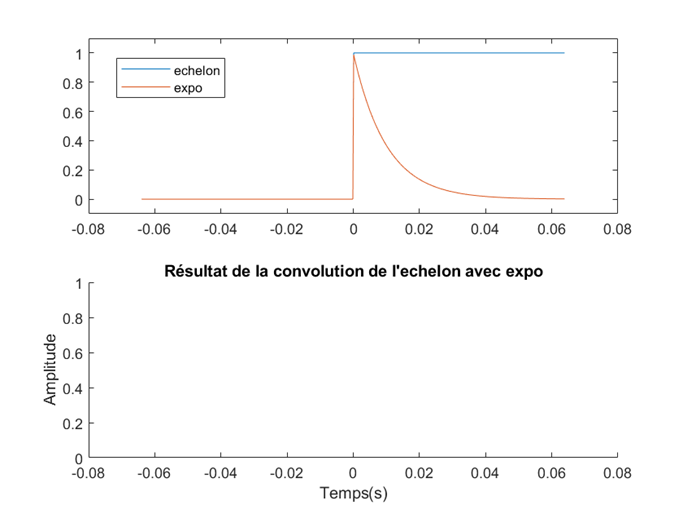

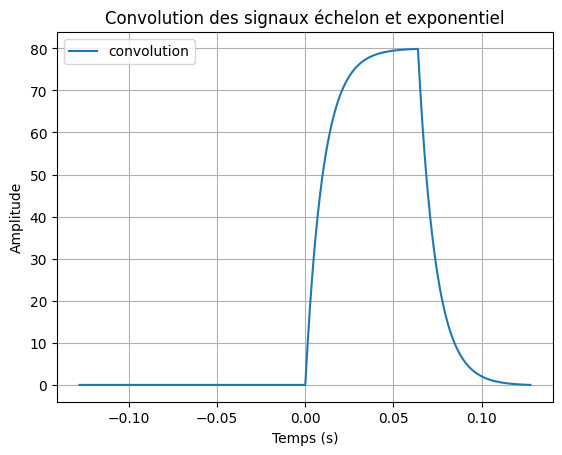

In [204]:
#*******************************************************************************
# écrire ici le code qui calcule expo*echelon et trace le résultat 
#*******************************************************************************
N = 2046
t = np.arange(-N/2,((N/2)-1))/Fe   #échelle de temps centrée en 0
c = np.convolve(echelon,expo) #calcul de la convolution
#-----------------------------------------------------------------------------
# Tracer le vecteur c

plt.figure()
plt.title("Convolution des signaux échelon et exponentiel")
plt.plot(t, c, label='convolution')
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

❓ Le résultat obtenu correspond-il à celui que vous aviez calculé sur papier ? **Expliquez**

La convolution correspond partiellement au résultat obtenu à la main. En effet, elle représente bel et bien l'aire sous la courbe de la convolution de la fonction exponentielle et échelon, mais ce résultat affiche également le résultat en dehors de ses bornes temporelles, ce qui n'était pas le cas dans le calcul manuel.

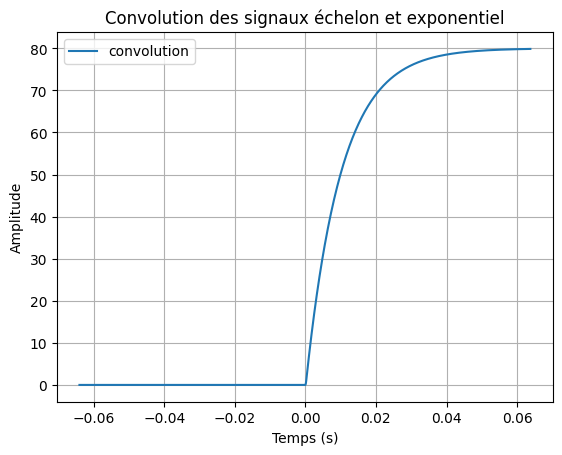

In [205]:
#*******************************************************************************
# écrire ici le code qui calcule expo*echelon et trace le résultat 
#*******************************************************************************
N = 1024
t = np.arange(-N/2,((N/2)-1))/Fe
c = np.convolve(echelon,expo, mode="same") #calcul de la convolution
#-----------------------------------------------------------------------------
# Tracer le vecteur c

plt.figure()
plt.title("Convolution des signaux échelon et exponentiel")
plt.plot(t, c, label='convolution')
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

### ✏️ 2.3 Interprétation (2 pts)

❓Décrire qualitatitevement le résultat de la convolution. Comment est ce que la convolution par l'exponentielle a transformé l'échelon ?

La convolution entre l'exponentielle et l'échelon à transformer la fonction échelon en une fonction qui commence à 0, puis augmente progressivement jusqu'à atteindre une valeur maximale. Cette transformation reflète l'effet de l'exponentielle décroissante, qui agit comme un lissage progressif de l'échelon (abrupt par-défaut).

❓Dans quel domaine de la vie quotidienne ou de la technologie observe‑t‑on une décroissance qui ressemble à une courbe exponentielle ? Donnez un exemple d’application qui peut être représentée par la convolution réalisée. 

On peut retrouver une décroissance ressemblant à une courbe exponentielle dans la Loi de Newton, notamment pour la conservation de température d'un objet, comme le refroidissement progressif d'une tasse de café chaud dans une pièce à température ambiante.

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

## 3- Profilométrie

### ⚙️ 3.1 Convolution d'un profil avec une pointe

Dans cette partie nous nous interessons à l'application de la convolution dans le cadre de mesures proflimétriques. Nous commençons par la mesure de la topographie d'une marche simple.

🧩 Fabriquez un vecteur marche sur 1024 points avec une largeur de marche d’amplitude 1 sur 400 points comme dans la figure ci-dessous. 

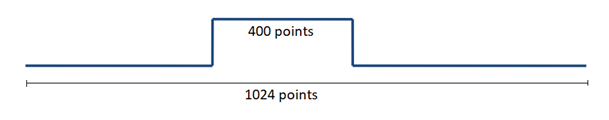

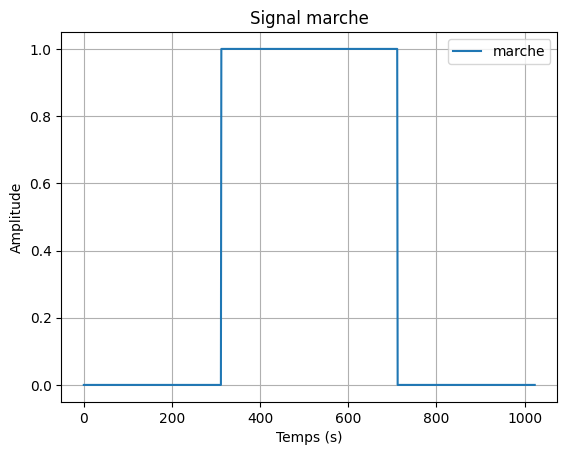

In [206]:
#*******************************************************************************
# écrire ici le code qui fabrique la marche, et la trace
#******************************************************************************

#indice: utiliser la fonction np.zeros() pour construire d'abord un vecteur de 1024 points
#contenant des zeros partout, puis mettez les 400 valeurs centrales à 1
N = 1024
marche = np.zeros(N)
marche[N//2-200:N//2+200] = 1

#tracé 
plt.figure()
plt.title("Signal marche")
plt.plot(marche, label='marche')
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


#### 🛠️ Pointe idéale infininiment étroite (1.5 pt)

Idéalement, la pointe avec laquelle on effectue la mesure doit être infiniment étroite. 

On se donne une pointe idéale représentée par le vecteur de taille 7 :  [0 0 0 1 0 0 0]
 
🧩 Convoluez cette pointe avec la marche précédemment construite et tracez le résultat

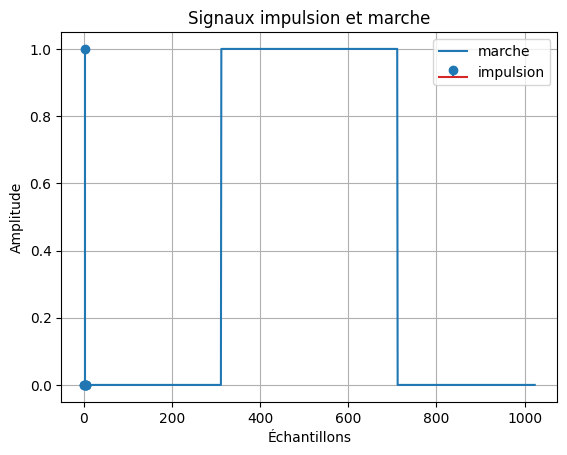

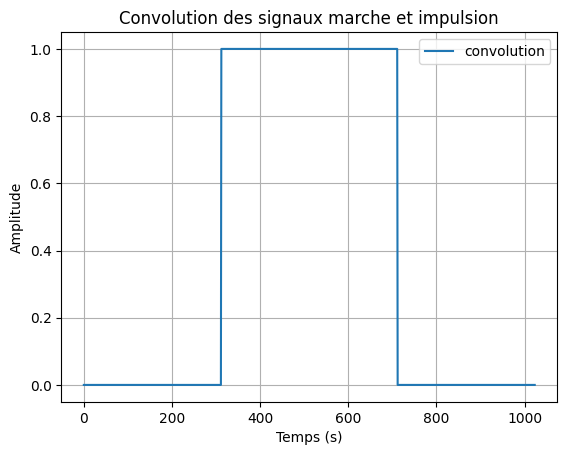

In [207]:
#*******************************************************************************
# écrire ici le code qui trace imp et marche
# les convolue et trace le résultat
#******************************************************************************
imp = np.array([0, 0, 0, 1 ,0 ,0 ,0])

#tracé de imp et marche
plt.figure()
plt.title("Signaux impulsion et marche")
plt.stem(imp, label='impulsion')
plt.plot(marche, label='marche')
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

#produit de convolution et tracé
c = np.convolve(marche,imp, mode="same")

plt.figure()
plt.title("Convolution des signaux marche et impulsion")
plt.plot(c, label='convolution')
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

❓Le produit de convolution de l’impulsion avec la marche est-il une surprise pour vous ? **Expliquez** pourquoi.  

L'impulsion est centré en 0, donc la convolution entre l'impulsion et la marche, devrait donner la marche elle-même.

#### 🛠️ Pointe triangulaire parfaite (4 pts)

Nous venons de montrer qu'en utilisant une pointe idéale, la mesure profilométrique reflète fidèlement la topographie de la structure. Dans la pratique, cependant, les pointes utilisées sont plutôt triangulaires de largeur non nulle. Dans cette section nous allons utiliser une telle pointe.

🧩 En appliquant un produit de convolution entre deux vecteurs à déterminer, fabriquez un vecteur *pointe_parfaite* sur 1024 points. La pointe aura une largeur de 40 points et un maximum égal à 1.

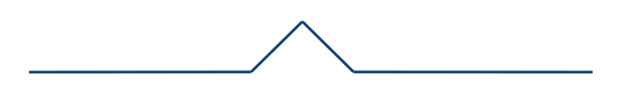

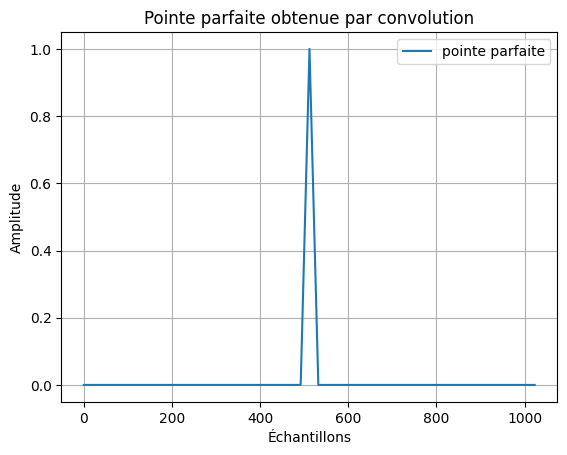

In [208]:
#*******************************************************************************
# écrire ici le code qui fabrique la pointe parfaite à partir de la convolution 
# de deux vecteurs 
#******************************************************************************

#définition des vecteurs
N = 1024
largeur = 40
hauteur = 1
pointe_parfaite = np.zeros(N)

#construction de la pointe parfaite

debut = (N - largeur) // 2
fin = debut + largeur

# Incrémentation et décrémentation linéaire à partir du centre
for i in range(largeur):
    if i <= largeur // 2:
        pointe_parfaite[debut + i] = (hauteur * i) / (largeur // 2)
    else:
        pointe_parfaite[debut + i] = hauteur * (1 - ((i - largeur // 2) / (largeur // 2)))


#tracé
plt.figure()
plt.title("Pointe parfaite obtenue par convolution")
plt.plot(pointe_parfaite, label='pointe parfaite')
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

✏️Expliquez le choix des vecteurs utilisés, de leurs largeurs et de leurs amplitudes.

J'ai créer un vecteur de 1024 points initialisé à 0. J'ai ensuite défini la largeur de ma pointe afin de décrémenter et d'incrémenter linéairement les valeurs du vecteur de 0 à 1, autour de mon centre. Ainsi, j'obtiens une pointe triangulaire centrée dans le vecteur.

🧩Calculez le produit de convolution de la *pointe_parfaite* avec la  marche  de la section précédente

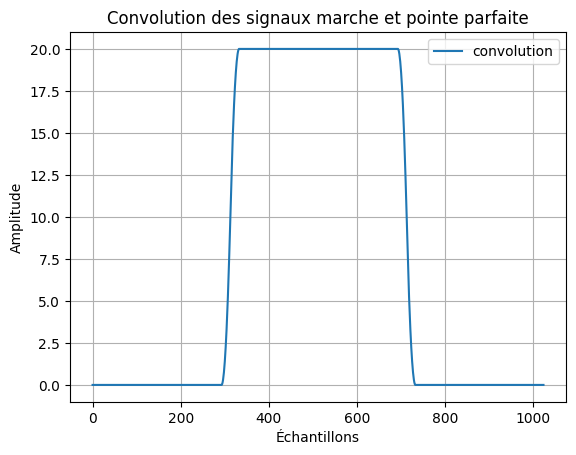

In [209]:
#*******************************************************************************
# écrire ici le code qui calucle le produit de convolution
# de la pointe_parfaite avec la marche, et trace les vecteurs impliqués
#******************************************************************************

c = np.convolve(marche, pointe_parfaite, mode="same")

plt.figure()
plt.title("Convolution des signaux marche et pointe parfaite")
plt.plot(c, label='convolution')
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

❓Comment est ce que la convolution par la pointe triangulaire a altéré la forme de la marche ? Comparez à la convolution par la pointe idéale infininiment étroite. 

La convolution entre la pointe_parfaite et la marche a pour effet de lisser les transitions de la marche, contrairement à la pointe idéale infiniment étroite qui ne modifie pas la forme de la marche.

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

### 📏 3.2 Déconvolution de la mesure

Nous venons de voir qu'en effectuant la mesure avec une pointe triangulaire, le résultat ne représente pas directement le profil de la structure. Remonter au profil exacte reste quand même possible à l'aide d'une opération supplémentaire. En effet, connaissant la forme de la pointe, on peut retrouver la topographie de la marche en déconvoluant simplement la mesure par la forme de la pointe.

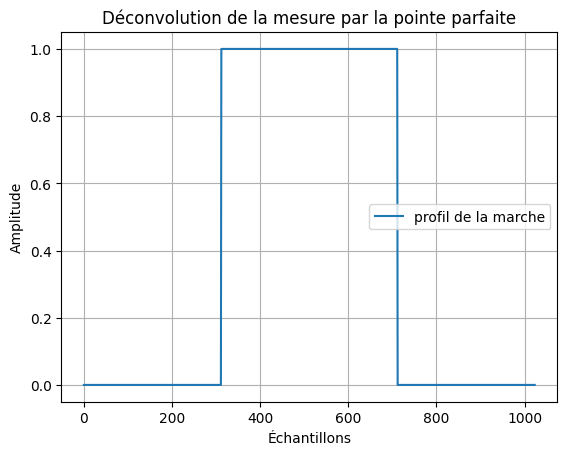

In [210]:
from scipy import signal  #module contenant la fonction de déconvolution

#on introduit un epsilon en première position dans le vecteur pointe_parfaite
#cela est indispensable à la déconvolution qui nécessite un premier élément différent de 0
epsilon = 1e-6
pointe_parfaite=pointe_parfaite.astype(float)
pointe_parfaite[0] =epsilon

#mesure du profil représentée par la convolution de la marche par la pointe modifiée
mesure = np.convolve(marche,pointe_parfaite, mode='full')  #la convolution en mode full est nécessaire pour une déconvolution plus simple

#déconvolution de la mesure par la pointe modifiée
quotient, reste= signal.deconvolve(mesure, pointe_parfaite)

#le quotient représente le profil de la marche, tracez le
plt.figure()
plt.title("Déconvolution de la mesure par la pointe parfaite")
plt.plot(quotient, label='profil de la marche')
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

### 💥3.3 Impact des défauts de pointe sur la restitution du profil (3.5 pts)

Deux défauts sont habituellement constatés sur les pointes : un bout cassé ou un bout arrondi. 

🧩 Fabriquez, par convolution, un vecteur *pointe_cassee* simulant un défaut de casse comme dans la figure ci-dessous.
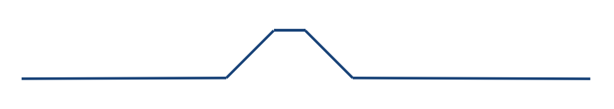

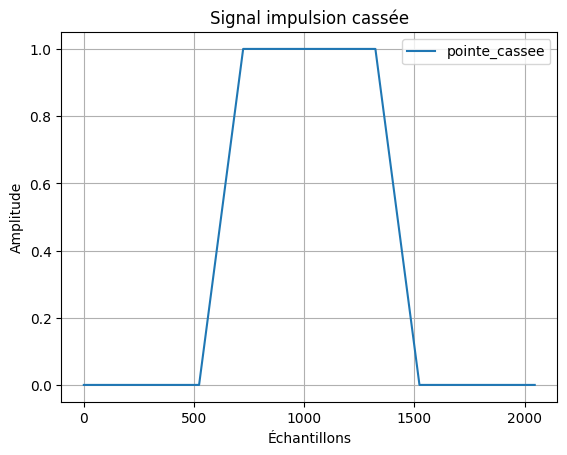

In [211]:
#*******************************************************************************
# écrire ici le code qui fabrique une pointe cassée et la trace
#******************************************************************************
N = 1024
marche1, marche2 = np.zeros(N), np.zeros(N)
marche1[N//2-400:N//2+400] = 1
marche2[N//2-100:N//2+100] = 1

# convolution
pointe_cassee = np.convolve(marche1, marche2)

# normalisation de la pointe cassée
pointe_cassee = pointe_cassee / np.max(pointe_cassee)

# tracé
plt.figure()
plt.title("Signal impulsion cassée")
plt.plot(pointe_cassee, label='pointe_cassee')
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

✏️Expliquez le choix des signaux utilisés pour la fabrication  

Afin de créer une impulsion cassée, j'ai créer 2 marches de tailles différentes (une plus large que l'autre), puis je les aies convolué entre-elles afin de créer une pointe cassée.

<div class="alert alert-block alert-info">
<b>Bonus:</b> S'il vous reste du temps à la fin du TP revenez à cette partie, construisez une pointe arrondie et utilisez-la dans le reste des réalisations en plus de la pointe cassée
</div>


🧩Calculez le profil qu'on mesurerait en utilisant cette pointe cassée sur la marche de départ, et comparez à la mesure obtenue précédemment avec la pointe parfaite.

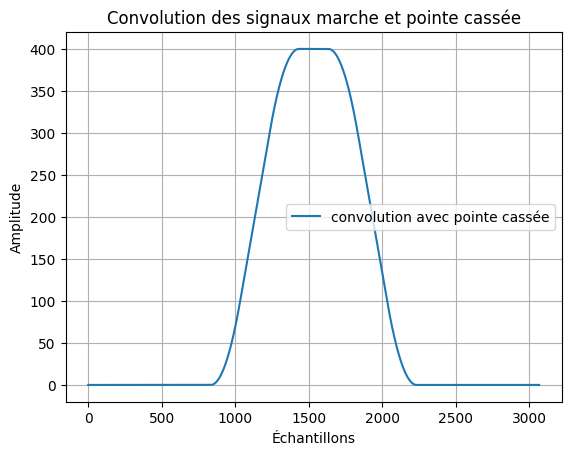

In [212]:
#*******************************************************************************
# écrire ici le code qui convolue la marche avec la pointe cassée
# tracer le résultat et le comparer à la convolution par la pointe parfaite
#******************************************************************************

c = np.convolve(marche,pointe_cassee)

plt.figure()
plt.title("Convolution des signaux marche et pointe cassée")
plt.plot(c, label='convolution avec pointe cassée')
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

✏️Commentez cette comparaison

La convolution entre une marche et la pointe cassée permet de lisser les transitions de la marche, mais de manière plus prononcée.

✏️ Expérimentez avec différentes tailles de cassures et commentez

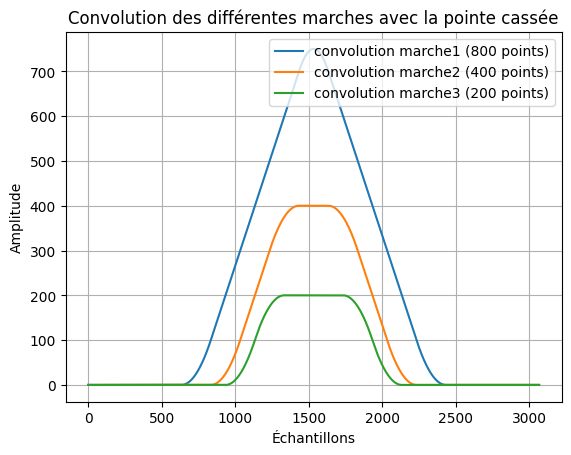

In [213]:
marche1, marche2, marche3 = np.zeros(N), np.zeros(N), np.zeros(N)
marche1[N//2-400:N//2+400] = 1
marche2[N//2-200:N//2+200] = 1
marche3[N//2-100:N//2+100] = 1

c1 = np.convolve(marche1, pointe_cassee)
c2 = np.convolve(marche2, pointe_cassee)
c3 = np.convolve(marche3, pointe_cassee)

plt.figure()
plt.title("Convolution des différentes marches avec la pointe cassée")
plt.plot(c1, label='convolution marche1 (800 points)')
plt.plot(c2, label='convolution marche2 (400 points)')
plt.plot(c3, label='convolution marche3 (200 points)')
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

Nous souhaitons maintenant retrouver la topographie de la structure mesurée par déconvolution. Si on ignore l'état de casse de la pointe, la déconvolution se fera avec la pointe idéale alors que la convolution s'est faite avec la pointe cassée. Le code ci-dessous permet d'effectuer cette déconvolution. 
Il faut noter qu'un simple appel de 'signal.deconvolve()' ne suffit  pas. En effet, cette fonction réalise une déconvolution exacte et suppose l'utilisation du même signal employé pour la convolution. Comme ce n'est pas le cas ici cela rend le calcul instable et amplifie fortement les erreurs donnant des résulats abérrants.
Il faut passer par des méthodes régularisées.



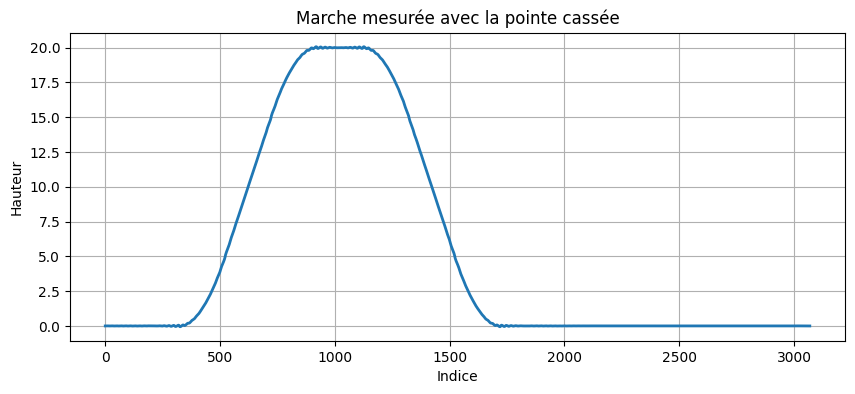

In [214]:
#on convolue par la pointe cassee 
cc=np.convolve(marche,pointe_cassee, mode='full')

#le fitrage de Wiener est une autre méthode de déconvolution qui passe par une transformée de Fourier.
#Il s'agit juste de l'utiliser ici sans chercher à l'expliquer
def deconv_wiener(y, h, eps=1e-3):
    H = np.fft.fft(h, len(y))
    Y = np.fft.fft(y)
    X_hat = Y * np.conj(H) / (np.abs(H)**2 + eps)
    return np.real(np.fft.ifft(X_hat))
# on déconvolue avec la pointe parfaite
x_rec = deconv_wiener(cc, pointe_parfaite)

plt.figure(figsize=(10,4))
plt.plot(x_rec, lw=2)
plt.title("Marche mesurée avec la pointe cassée")
plt.xlabel("Indice")
plt.ylabel("Hauteur")
plt.grid(True)
plt.show()

👀Observez le résultat

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

### 🔧 3.4 Caractérisation de la pointe de mesure (1.5 pts)

Comme nous venons de le voir la non prise en compte de l'état réel de la pointe crée du bruit, des oscillations ou même des artefacts physiques impossibles. C'est pour cette raison qu'en pratique on caractérise toujours la pointe avant de l'employer pour la mesure. Pour cela on effectue d'abord la mesure sur un profil parfaitement connu pour en tirer la forme exacte de la pointe.

Supposons qu'on souhaite mesurer la topographie d'une strucutre donnée par le profil ci-dessous

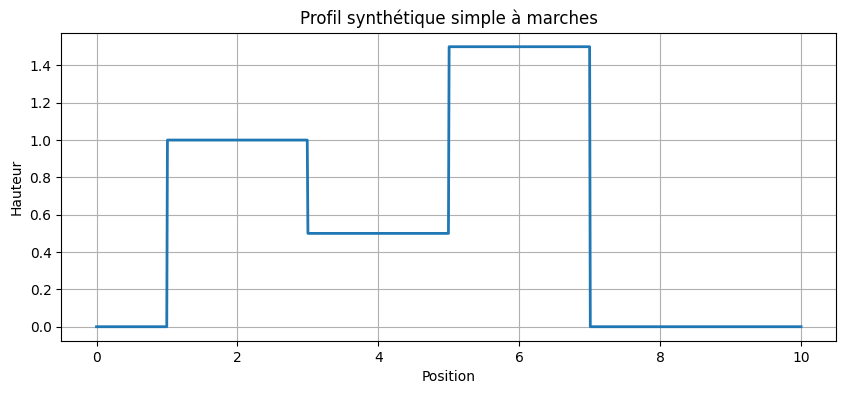

In [215]:
# Axe spatial
x = np.linspace(0, 10, 1024)

# Profil à marches
profil = np.zeros_like(x)

profil[(x >= 1) & (x < 3)] = 1.0   # 1ère marche
profil[(x >= 3) & (x < 5)] = 0.5   # 2ème marche
profil[(x >= 5) & (x < 7)] = 1.5   # 3ème marche
profil[(x >= 7)] = 0.0             # revient à zéro


plt.figure(figsize=(10,4))
plt.plot(x, profil, lw=2)
plt.title("Profil synthétique simple à marches")
plt.xlabel("Position")
plt.ylabel("Hauteur")
plt.grid(True)
plt.show()

Nous ne connaissons pas l'état de notre pointe. Le code ci-dessous construit une pointe qui, pour vous, est supposée inconnue.

In [216]:
from scipy.ndimage import gaussian_filter1d
N = 1024
largeur = 40
pointe = np.zeros(N)
centre = N // 2
demi_largeur = largeur // 2
indices = np.arange(centre - demi_largeur, centre + demi_largeur)
pointe[indices] = 1 - np.abs(indices - centre) / demi_largeur
pointe_inconnue = gaussian_filter1d(pointe, sigma=5)
pointe_inconnue /= np.sum(pointe_cassee)

Nous allons d'abord procéder à la caractérisation de cette pointe. Pour cela on reprend la première marche que nous avons fabriqué comme référence connue pour la caractérisation.

🧩 Convoluez la marche avec *pointe_inconnue* pour simuler la mesure réelle, puis déconvoluez le résultat par la marche afin de remonter à l'expression de la pointe inconnue, qu'on nommera *pointe_estimee*

In [217]:
#*******************************************************************************
# écrire ici le code qui convolue la marche avec la pointe inconnue 
# et remonte à la forme de la pointe par déconvolution
#******************************************************************************

#convolution marche et pointe_inconnue
c = np.convolve(marche,pointe_inconnue)

#déconvolution du résultat par marche pour estimer la forme de la pointe
# pointe_estimee = 


Maintenant que nous avons caractérisé la pointe et avons une estimation de sa forme, nous sommes prêts à effectuer la mesure du profil.

🧩 Calculez la forme de la mesure effectuée en utilisant la pointe inconnue sur le profil puis déconvoluez avec la pointe estimée. Vérifiez que vous récupérez correctement la topographie 

In [218]:
#*******************************************************************************
# écrire ici le code qui convolue le profil avec la pointe inconnue 
# puis remonte à la topographie du profil en déconvoluant par la pointe_estimee
#******************************************************************************

#convolution profil et pointe_inconnue
#mesure = ...

#déconvolution de la mesure par la pointe_estimee
#profil_mesure = ... 

#affichage et comparaison profil et profil_mesure



🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

### 🌀 3.5 Effet de la taille des motifs (1.5 pt)
🧩 Fabriquez un profil avec des marches plus ou moins rapprochées et observez le résultat de la convolution lorsque l'espacement est du même ordre de grandeur que la pointe de mesure (on adoptera la pointe parfaite)

In [219]:
#*******************************************************************************
# écrire ici le code qui construit des motifs divers et teste la convolution
#******************************************************************************




🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

🗂️ <u>***Avant de rendre votre travail :***</u>
* ✅ *Exécutez toutes les cellules*
* ✅ *Assurez vous que tous vos résultats/figures sont bien visibles*
* ✅*Exportez le fichier en format **pdf***
* ✅ *Déposez le **pdf** sur e-campus*